In [2]:
import my_utils as mu
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

In [4]:
# lol 견본 데이터 만들기

In [5]:
raw = mu.get_rawdata('GOLD')

100%|██████████| 12/12 [01:15<00:00,  6.32s/it]


In [6]:
raw

,match_id,matches,timelines
0,KR_6413236662,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
1,KR_6413211770,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
2,KR_6413188142,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
3,KR_6412341530,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
4,KR_6412275402,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
5,KR_6412228765,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
6,KR_6408239878,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
7,KR_6408225330,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
8,KR_6408203238,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
9,KR_6388387670,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."


In [12]:
# 'goldEarned', 'goldSpent'
def get_match_timeline_df(raw_data) :
    df_creator = []
    print('소환사 스텟 생성 중...')
    for i in range(len(raw_data)) :
        if 'status' in raw_data.iloc[i]['matches'].keys() or 'status' in  raw_data.iloc[i]['timelines'].keys():
            print('status : 426')
        else :
            for j in range(len(raw_data.iloc[i]['matches']['info']['participants'])) :
                lst_match = []
                lst_match.append(raw_data.iloc[i]['matches']['info']['gameId'])
                lst_match.append(raw_data.iloc[i]['matches']['info']['participants'][j]['goldEarned'])
                lst_match.append(raw_data.iloc[i]['matches']['info']['participants'][j]['goldSpent'])
                lst_match.append(raw_data.iloc[i]['matches']['info']['participants'][j]['summonerName'])
                lst_match.append(raw_data.iloc[i]['matches']['info']['participants'][j]['teamId'])
                lst_match.append(raw_data.iloc[i]['matches']['info']['participants'][j]['win'])
                df_creator.append(lst_match)
    gold_df = pd.DataFrame(df_creator, columns = ['gameId', 'goldEarned', 'goldSpent', 'summonerName', 'teamId', 'win'])
    return gold_df

In [13]:
gold_df = get_match_timeline_df(raw)

소환사 스텟 생성 중...


In [14]:
gold_df

,gameId,goldEarned,goldSpent,summonerName,teamId,win
0,6413236662,12786,12325,행복한닉네임,100,False
1,6413236662,10099,9375,검3단1끝,100,False
2,6413236662,9289,8800,hwang in yeop,100,False
3,6413236662,15700,15125,김밥오이빼,100,False
4,6413236662,6695,5825,도리도리목도랑,100,False
...,...,...,...,...,...,...
355,6409512386,11467,11258,대체로 좋음,200,False
356,6409512386,11966,11850,범내려어온다,200,False
357,6409512386,10162,10400,JeonSeBin,200,False
358,6409512386,14518,13300,으잉구,200,False


In [19]:
win_team = gold_df[gold_df.win == True]

In [20]:
win_team

,gameId,goldEarned,goldSpent,summonerName,teamId,win
5,6413236662,13430,12850,올챔감,200,True
6,6413236662,17147,14825,세상을구하는원딜,200,True
7,6413236662,13698,12400,Q평E평모니터평,200,True
8,6413236662,11628,11075,Ol현,200,True
9,6413236662,8358,7975,오틴의 방패,200,True
...,...,...,...,...,...,...
350,6409512386,10152,9015,체인소스맨,100,True
351,6409512386,15853,14875,2000년0909,100,True
352,6409512386,15108,14100,70216540215,100,True
353,6409512386,17655,15150,백골가요,100,True


In [22]:
lose_team = gold_df[gold_df.win == False]

In [23]:
lose_team

,gameId,goldEarned,goldSpent,summonerName,teamId,win
0,6413236662,12786,12325,행복한닉네임,100,False
1,6413236662,10099,9375,검3단1끝,100,False
2,6413236662,9289,8800,hwang in yeop,100,False
3,6413236662,15700,15125,김밥오이빼,100,False
4,6413236662,6695,5825,도리도리목도랑,100,False
...,...,...,...,...,...,...
355,6409512386,11467,11258,대체로 좋음,200,False
356,6409512386,11966,11850,범내려어온다,200,False
357,6409512386,10162,10400,JeonSeBin,200,False
358,6409512386,14518,13300,으잉구,200,False


In [24]:
# winteam
win_x_data = win_team.goldEarned
win_y_data = win_team.goldSpent

In [25]:
# loseteam
lose_x_data = lose_team.goldEarned
lose_y_data = lose_team.goldSpent

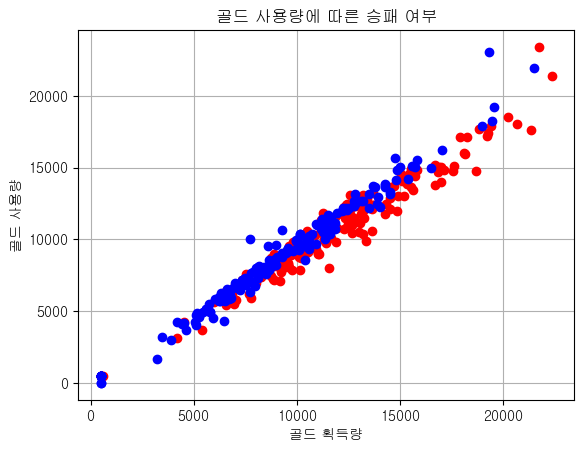

In [26]:
# 산점도 그래프 그리기
plt.figure()
plt.plot(win_x_data, win_y_data, color = 'r', marker = 'o', linestyle = 'None')
plt.plot(lose_x_data, lose_y_data, color = 'b', marker = 'o', linestyle = 'None')
plt.xlabel('골드 획득량')
plt.ylabel('골드 사용량')
plt.title('골드 사용량에 따른 승패 여부')
plt.grid(True)

In [27]:
# 라인 별 미니언 킬 수와 경기 승리 여부의 관계 확인
# 저장해야 하는 정보 : 라인, 미니언 킬 수, 게임 아이디, win

In [65]:
print(raw.iloc[0].matches['info']['participants'][0]['totalMinionsKilled'])
print(raw.iloc[0].matches['info']['participants'][0]['lane'])
print(raw.iloc[0].matches['info']['gameId'])
print(raw.iloc[0].matches['info']['participants'][0]['win'])
print(raw.iloc[0].matches['info']['participants'][0]['summonerName'])

211
TOP
6413236662
False
행복한닉네임


In [67]:
# 'goldEarned', 'goldSpent'
def get_line_minion_kills(raw_data) :
    df_creator = []
    print('소환사 스텟 생성 중...')
    for i in range(len(raw_data)) :
        if 'status' in raw_data.iloc[i]['matches'].keys() or 'status' in  raw_data.iloc[i]['timelines'].keys():
            print('status : 426')
        else :
            for j in range(len(raw_data.iloc[i]['matches']['info']['participants'])) :
                lst_match = []
                lst_match.append(raw.iloc[i].matches['info']['gameId'])
                lst_match.append(raw.iloc[i].matches['info']['participants'][j]['summonerName'])
                lst_match.append(raw.iloc[i].matches['info']['participants'][j]['lane'])
                lst_match.append(raw.iloc[i].matches['info']['participants'][j]['totalMinionsKilled'])
                lst_match.append(raw.iloc[i].matches['info']['participants'][j]['win'])
                df_creator.append(lst_match)
    minion_kill = pd.DataFrame(df_creator, columns = ['gameId', 'summonerName', 'lane', 'totalMinionsKilled', 'win'])
    return minion_kill

In [68]:
mini_k = get_line_minion_kills(raw)

소환사 스텟 생성 중...


In [69]:
mini_k

,gameId,summonerName,lane,totalMinionsKilled,win
0,6413236662,행복한닉네임,TOP,211,False
1,6413236662,검3단1끝,JUNGLE,40,False
2,6413236662,hwang in yeop,MIDDLE,160,False
3,6413236662,김밥오이빼,BOTTOM,229,False
4,6413236662,도리도리목도랑,BOTTOM,28,False
...,...,...,...,...,...
355,6409512386,대체로 좋음,TOP,225,False
356,6409512386,범내려어온다,JUNGLE,28,False
357,6409512386,JeonSeBin,MIDDLE,165,False
358,6409512386,으잉구,BOTTOM,215,False


In [82]:
win_mini_k = mini_k[mini_k.win == True]
win_mini_k

,gameId,summonerName,lane,totalMinionsKilled,win
5,6413236662,올챔감,TOP,186,True
6,6413236662,세상을구하는원딜,JUNGLE,27,True
7,6413236662,Q평E평모니터평,TOP,219,True
8,6413236662,Ol현,BOTTOM,146,True
9,6413236662,오틴의 방패,BOTTOM,42,True
...,...,...,...,...,...
350,6409512386,체인소스맨,TOP,143,True
351,6409512386,2000년0909,JUNGLE,41,True
352,6409512386,70216540215,MIDDLE,219,True
353,6409512386,백골가요,BOTTOM,255,True


In [83]:
lose_mini_k = mini_k[mini_k.win == False]
lose_mini_k

,gameId,summonerName,lane,totalMinionsKilled,win
0,6413236662,행복한닉네임,TOP,211,False
1,6413236662,검3단1끝,JUNGLE,40,False
2,6413236662,hwang in yeop,MIDDLE,160,False
3,6413236662,김밥오이빼,BOTTOM,229,False
4,6413236662,도리도리목도랑,BOTTOM,28,False
...,...,...,...,...,...
355,6409512386,대체로 좋음,TOP,225,False
356,6409512386,범내려어온다,JUNGLE,28,False
357,6409512386,JeonSeBin,MIDDLE,165,False
358,6409512386,으잉구,BOTTOM,215,False


In [86]:
win_lane_mini = win_mini_k.groupby(['lane'])[['totalMinionsKilled']].sum()

In [91]:
win_lane_mini.reset_index(inplace = True)

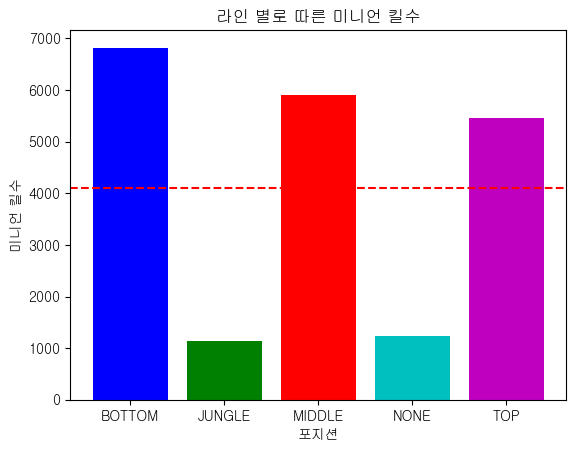

In [94]:
plt.figure()
plt.bar(win_lane_mini.lane, win_lane_mini.totalMinionsKilled, color = ['b', 'g', 'r', 'c', 'm'])
plt.xlabel('포지션')
plt.ylabel('미니언 킬수')
plt.title('라인 별로 따른 미니언 킬수')

mean_val = win_lane_mini.totalMinionsKilled.mean()
plt.axhline(y = mean_val, color = 'r', linestyle = 'dashed')

In [96]:
win_lane_mini = win_lane_mini.rename(columns = {'totalMinionsKilled' : 'win_totalMinionsKilled'})

In [97]:
win_lane_mini

,lane,win_totalMinionsKilled
0,BOTTOM,6821
1,JUNGLE,1131
2,MIDDLE,5906
3,NONE,1226
4,TOP,5451


In [99]:
lose_lane_mini = lose_mini_k.groupby(['lane'])[['totalMinionsKilled']].sum()

In [101]:
lose_lane_mini.reset_index(inplace = True)

In [102]:
lose_lane_mini

,lane,totalMinionsKilled
0,BOTTOM,6328
1,JUNGLE,1208
2,MIDDLE,5529
3,NONE,845
4,TOP,5698


In [103]:
lose_lane_mini = lose_lane_mini.rename(columns = {'totalMinionsKilled' : 'lose_totalMinionsKilled'})

In [104]:
lose_lane_mini

,lane,lose_totalMinionsKilled
0,BOTTOM,6328
1,JUNGLE,1208
2,MIDDLE,5529
3,NONE,845
4,TOP,5698


In [105]:
lane_mini = pd.merge(win_lane_mini, lose_lane_mini, on = ['lane'])

In [106]:
lane_mini

,lane,win_totalMinionsKilled,lose_totalMinionsKilled
0,BOTTOM,6821,6328
1,JUNGLE,1131,1208
2,MIDDLE,5906,5529
3,NONE,1226,845
4,TOP,5451,5698


In [ ]:
plt.figure()
plt.bar(win_lane_mini.lane, win_lane_mini.totalMinionsKilled, color = ['b', 'g', 'r', 'c', 'm'])
plt.xlabel('포지션')
plt.ylabel('미니언 킬수')
plt.title('라인 별로 따른 미니언 킬수')

mean_val = win_lane_mini.totalMinionsKilled.mean()
plt.axhline(y = mean_val, color = 'r', linestyle = 'dashed')

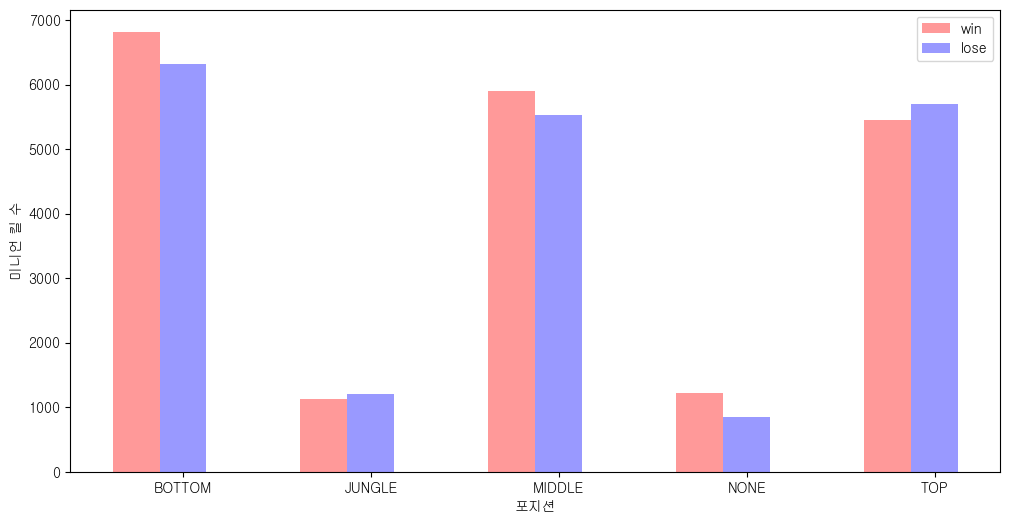

In [110]:
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25
columns = ['BOTTOM', 'JUNGLE', 'MIDDLE', 'NONE', 'TOP']

index = np.arange(5)

b1 = plt.bar(index, lane_mini['win_totalMinionsKilled'], bar_width, alpha = 0.4, color = 'red', label = 'win')
b2 = plt.bar(index + bar_width, lane_mini['lose_totalMinionsKilled'], bar_width, alpha = 0.4, color = 'blue', label = 'lose')

plt.xticks(np.arange(bar_width, 5 + bar_width, 1), columns)

plt.xlabel('포지션')
plt.ylabel('미니언 킬 수')
plt.legend()
plt.show()

In [111]:
# 티어 별로 다른 처음 와드 설치하는 장소

In [112]:
raw

,match_id,matches,timelines
0,KR_6413236662,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
1,KR_6413211770,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
2,KR_6413188142,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
3,KR_6412341530,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
4,KR_6412275402,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
5,KR_6412228765,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
6,KR_6408239878,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
7,KR_6408225330,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
8,KR_6408203238,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."
9,KR_6388387670,"{'metadata': {'dataVersion': '2', 'matchId': '...","{'metadata': {'dataVersion': '2', 'matchId': '..."


In [113]:
raw.iloc[0].timelines

{'metadata': {'dataVersion': '2',
  'matchId': 'KR_6413236662',
  'participants': ['_CkTZjOWQJSZAm8pH-LNuXfwIVSUhBHqbaePsE365b1GIb3nC_ixFq958o9ycMnXfQJLN9j_a_94cg',
   'g-47F5dEdVi9ctDwM7BK-moe8noY28egmSV97CwW3H7QukV3GLHdeL5soqCYe9zeQ4gM5e_tFNQzhQ',
   'PiT3FsihRGaTdoW9uZRO8DrcHxHK5QBZoVgh2hxY5QB7_PyUoXdkRvHL6sipPG88AwrkGcgrvB19fQ',
   'FbM4_X-Jiju_MEmlTvhf1qLIOcCHFNOJd8q6NAVvzNhVek88BAynO629ieggHMaDYQcL2qPeuG-wFg',
   'm2sIm4FQyupq8IiGrbxyWpWEuDM7dzpwJQgzJjHbHMmleIHu4SKBR-saB-MEbsq9oO2c6e8e9oRTkQ',
   'LQYIxBEwE5qK6h0OP-5EHkzF6bFGXSLOxAzSzY8q7uD-aDwX6pA9P6sRN7Wh7Az1s6pVqBpnKGpKww',
   'Ic6PnervPOi7JrWuMdyxmAkiT45hyAXZQSsk5-qdRrUTCnQaynNCiLyopx3SY2KkGY6Rz1KPp7luaA',
   '05cHXFOeHxPmaeI9AGocjYyKhXGKq8gJdsleKm80p1exv7NtTBxglRwKsCXLcJB8k2fu8Dfou4YJ3g',
   'AFi5O1WrJlZcpuBvhtXQkZ5glF2ADYZqhaFeRr_KklIMf6ffdAFv1PtX6IAdN-R8AAgk7WHllFV28A',
   '7NTQI6hb2_jiljBuXLRuqEtE6LoP-7MayO7uiLMRSLHZ4p87XPGdyFDHFt9vU87f8Vaf8z4r3TYo_A']},
 'info': {'frameInterval': 60000,
  'frames': [{'events': [{'realTim